4.1 Solution

In [2]:
#trying to create a polygon with the points given

from shapely.geometry import Polygon
poly = Polygon([(-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.96990),(9-118.4152,33.9699)])



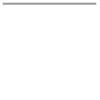

In [3]:
poly

In [4]:
xy=poly.exterior.coords


In [9]:
centroid = poly.centroid
boundingbox=poly.bounds

#here we are extracting the centroid and the bounding box. The bounding box of the polygon is the smallest rectangle in which the polygon can fit. This is used to determine the sice and location of the polygon in space

In [8]:
print(xy)
print(centroid)
print(boundingbox)

POINT (-118.4147245614035 33.96940877192983)
(-118.4152, 33.9689, -109.4152, 33.9699)


4.2 solution

In [4]:
import geopandas as pd

In [5]:
#to load the data set

df=pd.read_file("data/Justice_Equity_Need_Index.geojson")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [6]:
print(df.crs)

#The WGS84 Coordinate Systems adds Greenwich as the starting point (prime meridian) for the longitude (0°) and sets the units in degrees (°)

epsg:4326


In [7]:
print(df.shape)

#The size is: 281 rows and 18 columns

(281, 18)


In [8]:
print(df.columns)

#This gives us a list of column names inside the dataframe

Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [9]:
print(df.head(10))

#printing first 10 rows of the dataframe

   OBJECTID    zip jenicategory  jenipctl  jenirank riskcategory  riskpctl  \
0         1  91108       Lowest       0.0       277       Lowest       0.4   
1         2  90631       Lowest       0.4       276       Lowest       2.9   
2         3  90274       Lowest       0.7       275       Lowest       3.6   
3         4  91361       Lowest       1.1       274       Lowest      12.2   
4         5  90275       Lowest       1.4       273       Lowest       6.8   
5         6  90077       Lowest       1.8       272       Lowest       2.5   
6         7  91436       Lowest       2.2       271       Lowest      10.4   
7         8  90094       Lowest       2.5       270       Lowest       9.0   
8         9  91007       Lowest       2.9       269       Lowest       3.2   
9        10  90049       Lowest       3.3       268       Lowest      13.6   

  driverscategory  driverspctl systemcategory  systempctl  \
0          Lowest          0.7         Lowest         3.3   
1          Lowest  

In [10]:
df_copy = df.copy()

#making a copy of the original dataframe

In [11]:
#creating a new variable that stores a reprojected copy of our dataframe

df_reprojected = df_copy.to_crs(epsg=3857)

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Justice Equity Need Index (Reprojected)')

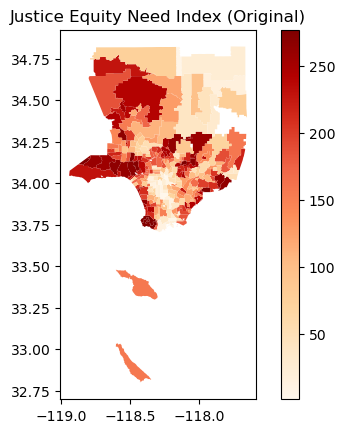

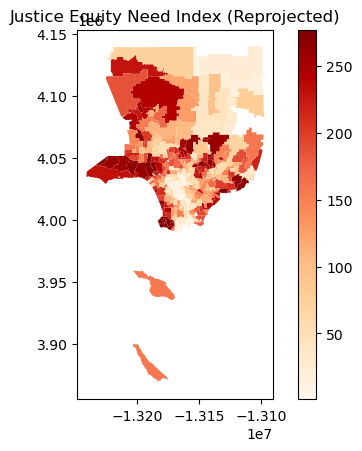

In [15]:
df.plot(column="jenirank", cmap="OrRd", legend=True)
plt.title("Justice Equity Need Index (Original)")

df_reprojected.plot(column="jenirank", cmap="OrRd", legend=True)
plt.title("Justice Equity Need Index (Reprojected)")

Based on my understanding of class, a projected coordinate system can show the polygons in a different shape than what we would expect from a Geographic coordinate system. There would also be a difference in scale. 

Polygon features shown on a map can vary depending on the coordinate system used. 